# C-Means


In [1]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

In [8]:
df_data = pd.read_csv("Iris.csv")
df_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df_data = df_data.drop(['Id'], axis=1)


In [25]:
columns = list(df_data.columns)
features = columns[:len(columns)-1]
class_labels = list(df_data[columns[-1]])
df = df_data[features]
print(df)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


## Defining Parameters

In [18]:
k = 3
MAX_ITR = 100
n = len(df)
print(n)
m = 1.7 #fuzzy-parameter (if its 1 it is same as K-nn)

150


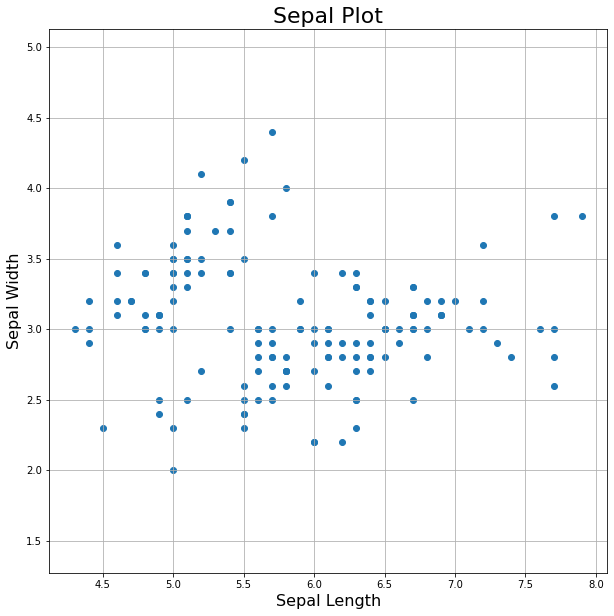

In [12]:
plt.figure(figsize=(10,10)) #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

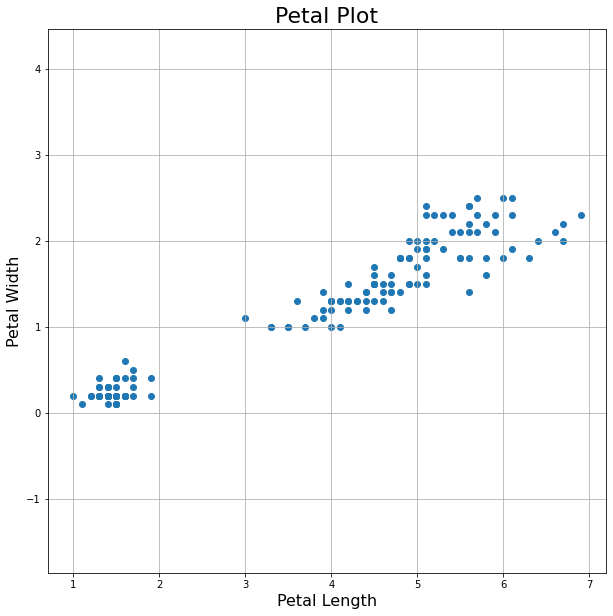

In [13]:
plt.figure(figsize=(10,10)) #scatter plot of petal length vs sepal width                          
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

In [35]:
def initializeMembershipMatrix(): # initializing the membership matrix
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [70]:
membership_mat = initializeMembershipMatrix()

In [49]:
def calculateClusterCenter(membership_mat): # calculating the cluster center
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(3):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [50]:

calculateClusterCenter(membership_mat)


[[5.885714285714284,
  2.9785714285714286,
  3.7678571428571423,
  1.1428571428571426],
 [5.769047619047619,
  3.1214285714285714,
  3.6880952380952374,
  1.2285714285714282],
 [5.8576923076923055,
  3.0807692307692323,
  3.8057692307692315,
  1.2346153846153847]]

In [29]:
def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat
    

In [30]:
def getClusters(membership_mat): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

In [38]:
def fuzzyCMeansClustering(): #Third iteration Random vectors from data
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITR:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc

In [66]:
labels, centers, acc = fuzzyCMeansClustering()
print(labels)
print(centers)

Cluster Centers:
[[5.91320755 3.09811321 3.79811321 1.21132075]
 [5.88333333 3.03       3.86333333 1.26166667]
 [5.67837838 3.02972973 3.53243243 1.07837838]]
---------------------------
Partition matrix:
[[1.72424329e-04 5.67819162e-05 9.99770794e-01]
 [2.82446451e-03 8.86481003e-04 9.96289054e-01]
 [2.17929773e-03 7.19013163e-04 9.97101689e-01]
 [4.49283135e-03 1.40779918e-03 9.94099369e-01]
 [3.63741759e-04 1.21557690e-04 9.99514701e-01]
 [1.29758903e-02 4.21005758e-03 9.82814052e-01]
 [2.30718744e-03 7.57109076e-04 9.96935703e-01]
 [8.40484306e-06 2.66508464e-06 9.99988930e-01]
 [1.38351228e-02 4.45892768e-03 9.81705950e-01]
 [1.72962558e-03 5.38252020e-04 9.97732122e-01]
 [4.41894904e-03 1.47299186e-03 9.94108059e-01]
 [5.91849425e-04 1.84218020e-04 9.99223933e-01]
 [3.77067942e-03 1.20017378e-03 9.95029147e-01]
 [1.57289028e-02 5.52748695e-03 9.78743610e-01]
 [2.67674268e-02 1.03172071e-02 9.62915366e-01]
 [4.74741073e-02 1.84083981e-02 9.34117495e-01]
 [9.16970181e-03 3.27260430

In [51]:
seto = max(set(labels[0:50]), key=labels[0:50].count)
vers = max(set(labels[50:100]), key=labels[50:100].count)
virg = max(set(labels[100:]), key=labels[100:].count)

In [67]:
s_mean_clus1 = np.array([centers[seto][0],centers[seto][1]])
s_mean_clus2 = np.array([centers[vers][0],centers[vers][1]])
s_mean_clus3 = np.array([centers[virg][0],centers[virg][1]])
print(s_mean_clus1)

[6.80722429 3.05991213]


In [53]:
values = np.array(labels) #label

#search all 3 species
searchval_seto = seto
searchval_vers = vers
searchval_virg = virg

#index of all 3 species
ii_seto = np.where(values == searchval_seto)[0]
ii_vers = np.where(values == searchval_vers)[0]
ii_virg = np.where(values == searchval_virg)[0]
ind_seto = list(ii_seto)
ind_vers = list(ii_vers)
ind_virg = list(ii_virg)

In [57]:
sepal_df = df_data.iloc[:,0:2]


In [58]:
seto_df = sepal_df[sepal_df.index.isin(ind_seto)]
vers_df = sepal_df[sepal_df.index.isin(ind_vers)]
virg_df = sepal_df[sepal_df.index.isin(ind_virg)]

In [59]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))

In [60]:
sepal_df = np.array(sepal_df)

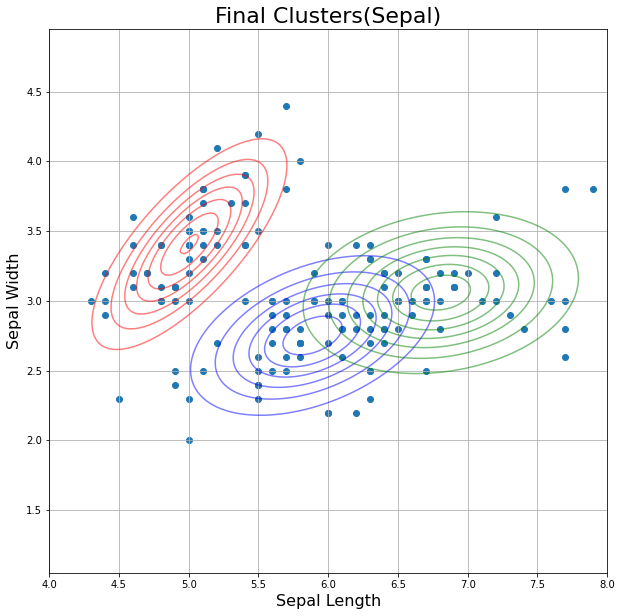

In [61]:
x1 = np.linspace(4,8,150)  
x2 = np.linspace(1.5,4.5,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(s_mean_clus1, cov_seto)  
Z2 = multivariate_normal(s_mean_clus2, cov_vers)
Z3 = multivariate_normal(s_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))                
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                        
plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                              
plt.ylabel('Sepal Width', fontsize=16)                                                
plt.title('Final Clusters(Sepal)', fontsize=22)                                           
plt.grid()                                                                        
plt.show()

In [74]:
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, centers[j])))) for j in range(k)]
        print(distances)
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den) 

[3.3839269434643624, 4.991797431532749, 0.16302916821507665]
[3.362851957794557, 5.044882897047829, 0.4316189617952278]
[3.533649400364984, 5.209263927273777, 0.4140716031698577]
[3.3862913910261456, 5.0829650042329835, 0.5116888315265259]
[3.4319038780998206, 5.036616327312382, 0.2147269262724704]
[3.1132145960906312, 4.616429990639031, 0.6846081915787354]
[3.481101218531716, 5.141504265956592, 0.4161617454913161]
[3.3007805613178998, 4.934045654896502, 0.055233644290815925]
[3.5365306814128017, 5.256429411606659, 0.7956608485408398]
[3.321972591750012, 4.998437841611807, 0.358942096804638]
[3.2898837734805206, 4.832502438173093, 0.49424290648860913]
[3.275110034648711, 4.927578906810306, 0.2430064698972275]
[3.430377758450588, 5.12098335257716, 0.48735595888641237]
[3.870002859308415, 5.580473264503225, 0.911636293772123]
[3.6143072001620125, 5.045923124260697, 1.031410480755955]
[3.4633142883630916, 4.824987447362987, 1.220706508556587]
[3.462326232670751, 4.965689809685085, 0.67312